# 09wk-1: 중간고사

---



202014107 경제학부 강신성

### Library imports

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from plotnine import * 
#---#
import PIL
import io 
import requests
import cv2 

# 1. 에너지사용량 – 80점

In [2]:
pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2019.csv')

,지역,건물동수,연면적,에너지사용량(TOE)/전기,에너지사용량(TOE)/도시가스,에너지사용량(TOE)/지역난방
0,종로구,"17,851","9,204,140","63,492","76,653",799
1,중구,"10,383","10,078,848","79,223","68,210",497
2,용산구,"17,138","10,756,612","51,229","79,805","11,128"
3,성동구,"13,980","11,804,313","59,832","99,986",0
4,광진구,"21,556","12,272,738","68,756","123,447",0
5,동대문구,"21,794","12,664,554","65,913","111,420",0
6,중랑구,"23,950","15,182,802","59,370","109,284","7,442"
7,성북구,"27,112","15,938,807","77,007","148,376",0
8,강북구,"23,334","9,458,987","47,731","100,045",0
9,도봉구,"13,168","10,644,704","44,985","90,379","5,268"


에너지 사용량은 2018년부터 2021년까지의 기간 동안 서울, 부산 등 여러
지역에 대해 정리되어 있으며, 아래 주소 형식으로 저장되어 있다.

    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2018.csv
    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2019.csv
    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2020.csv
    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Seoul2021.csv
    ...
    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Busan2018.csv
    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Busan2019.csv
    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Busan2020.csv
    https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/Busan2021.csv

아래의 `url`, `prov`를 참고하여 모든 자료를 불러온 뒤 `pd.concat()`을
이용하여 하나의 df로 합쳐라.

In [2]:
url = 'https://raw.githubusercontent.com/guebin/DV2022/main/posts/Energy/{}.csv'

prov = ['Seoul', 'Busan', 'Daegu', 'Incheon', 
        'Gwangju', 'Daejeon', 'Ulsan', 'Sejongsi', 
        'Gyeonggi-do', 'Gangwon-do', 'Chungcheongbuk-do', 
        'Chungcheongnam-do', 'Jeollabuk-do', 'Jeollanam-do', 
        'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do']

의미상 숫자형이지만 문자형으로 입력이된 자료를 모두 전처리하고, 아래의
딕셔너리를 이용하여 열의 이름을 변환하라.

In [3]:
name_dict = {
    '년도': 'Year',
    '시도': 'Prov',
    '지역': 'Reg',
    '건물동수': 'BldgCount',
    '연면적': 'Area',
    '에너지사용량(TOE)/전기': 'Elec',
    '에너지사용량(TOE)/도시가스': 'Gas',
    '에너지사용량(TOE)/지역난방': 'Heat'
}

데이터 불러오기

In [196]:
list(range(2018, 2022))

[2018, 2019, 2020, 2021]

In [4]:
df = pd.concat([pd.read_csv(url.format(region+str(year))).assign(Year = year).assign(Prov = region) for year in range(2018, 2022) for region in prov], axis = 0)

In [5]:
df.rename(name_dict, axis = 1)

,Reg,BldgCount,Area,Elec,Gas,Heat,Year,Prov
0,종로구,"17,929","9,141,777","64,818","82,015",111,2018,Seoul
1,중구,"10,598","10,056,233","81,672","75,260",563,2018,Seoul
2,용산구,"17,201","10,639,652","52,659","85,220","12,043",2018,Seoul
3,성동구,"14,180","11,631,770","60,559","107,416",0,2018,Seoul
4,광진구,"21,520","12,054,796","70,609","130,308",0,2018,Seoul
...,...,...,...,...,...,...,...,...
19,함양군,"12,505","1,509,149","6,328","3,164",0,2021,Gyeongsangnam-do
20,거창군,"14,607","2,322,093","10,404","8,850",0,2021,Gyeongsangnam-do
21,합천군,"16,039","1,612,734","7,587",0,0,2021,Gyeongsangnam-do
0,제주시,"67,053","20,275,738","103,217","25,689",0,2021,Jeju-do


(1) 에너지 사용 추세

In [199]:
df.rename(name_dict, axis = 1)

,Reg,BldgCount,Area,Elec,Gas,Heat,Year,Prov
0,종로구,"17,929","9,141,777","64,818","82,015",111,2018,Seoul
1,중구,"10,598","10,056,233","81,672","75,260",563,2018,Seoul
2,용산구,"17,201","10,639,652","52,659","85,220","12,043",2018,Seoul
3,성동구,"14,180","11,631,770","60,559","107,416",0,2018,Seoul
4,광진구,"21,520","12,054,796","70,609","130,308",0,2018,Seoul
...,...,...,...,...,...,...,...,...
19,함양군,"12,505","1,509,149","6,328","3,164",0,2021,Gyeongsangnam-do
20,거창군,"14,607","2,322,093","10,404","8,850",0,2021,Gyeongsangnam-do
21,합천군,"16,039","1,612,734","7,587",0,0,2021,Gyeongsangnam-do
0,제주시,"67,053","20,275,738","103,217","25,689",0,2021,Jeju-do


In [6]:
df.rename(name_dict, axis = 1).set_index(['Reg', 'Prov'])\
.applymap(lambda x : str(x).replace(',','')).astype('int').reset_index()

,Reg,Prov,BldgCount,Area,Elec,Gas,Heat,Year
0,종로구,Seoul,17929,9141777,64818,82015,111,2018
1,중구,Seoul,10598,10056233,81672,75260,563,2018
2,용산구,Seoul,17201,10639652,52659,85220,12043,2018
3,성동구,Seoul,14180,11631770,60559,107416,0,2018
4,광진구,Seoul,21520,12054796,70609,130308,0,2018
...,...,...,...,...,...,...,...,...
995,함양군,Gyeongsangnam-do,12505,1509149,6328,3164,0,2021
996,거창군,Gyeongsangnam-do,14607,2322093,10404,8850,0,2021
997,합천군,Gyeongsangnam-do,16039,1612734,7587,0,0,2021
998,제주시,Jeju-do,67053,20275738,103217,25689,0,2021


In [201]:
df.rename(name_dict, axis = 1).set_index(['Reg', 'Prov'])\
.applymap(lambda x : str(x).replace(',','')).astype('int').reset_index()\
.drop(['Reg', 'BldgCount', 'Prov', 'Area'], axis = 1)\
.set_index('Year').stack().reset_index().pivot_table(index = 'Year', values = 0, aggfunc = 'sum')\
.rename({0 : 'EnergyUse'}, axis = 1).reset_index()

,Year,EnergyUse
0,2018,23355587
1,2019,22661264
2,2020,22827850
3,2021,26479256


In [202]:
tidydata = df.rename(name_dict, axis = 1).set_index(['Reg', 'Prov'])\
.applymap(lambda x : str(x).replace(',','')).astype('int').reset_index()\
.drop(['Reg', 'BldgCount', 'Prov', 'Area'], axis = 1)\
.set_index('Year').stack().reset_index().pivot_table(index = 'Year', values = 0, aggfunc = 'sum')\
.rename({0 : 'EnergyUse'}, axis = 1).reset_index()

In [203]:
fig = ggplot(tidydata)
line = geom_line(aes(x = 'Year', y = 'EnergyUse'))
point = geom_point(aes(x = 'Year', y = 'EnergyUse'))

fig = (fig + line + point).draw()

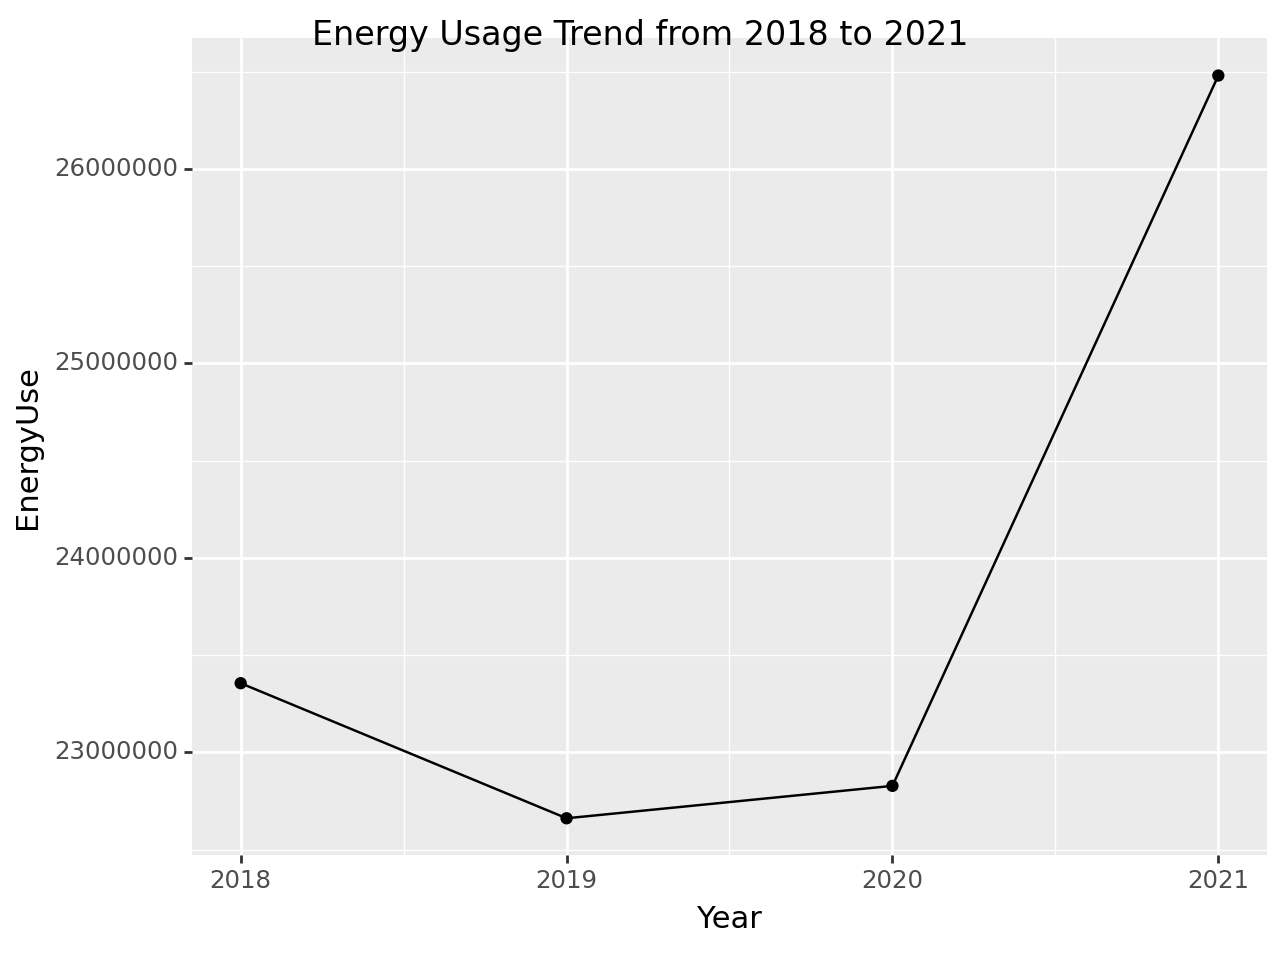

In [204]:
fig.suptitle('Energy Usage Trend from 2018 to 2021')
fig

(2) 에너지 종류별 사용 추세

In [205]:
df = df.rename(name_dict, axis = 1).set_index(['Reg', 'Prov'])\
.applymap(lambda x : str(x).replace(',','')).astype('int').reset_index()

In [206]:
df.drop(['Reg', 'Prov', 'BldgCount', 'Area'], axis = 1).set_index('Year')\
.stack().reset_index().rename({'level_1' : 'EnergyType', 0 : 'EnergyUse'}, axis = 1)\
.pivot_table(index = ['Year', 'EnergyType'], values = 'EnergyUse', aggfunc = sum)\
.reset_index()

,Year,EnergyType,EnergyUse
0,2018,Elec,9855181
1,2018,Gas,11456170
2,2018,Heat,2044236
3,2019,Elec,9661524
4,2019,Gas,10990282
5,2019,Heat,2009458
6,2020,Elec,9636650
7,2020,Gas,11109471
8,2020,Heat,2081729
9,2021,Elec,11824724


In [207]:
tidydata = df.drop(['Reg', 'Prov', 'BldgCount', 'Area'], axis = 1).set_index('Year')\
.stack().reset_index().rename({'level_1' : 'EnergyType', 0 : 'EnergyUse'}, axis = 1)\
.pivot_table(index = ['Year', 'EnergyType'], values = 'EnergyUse', aggfunc = sum)\
.reset_index()

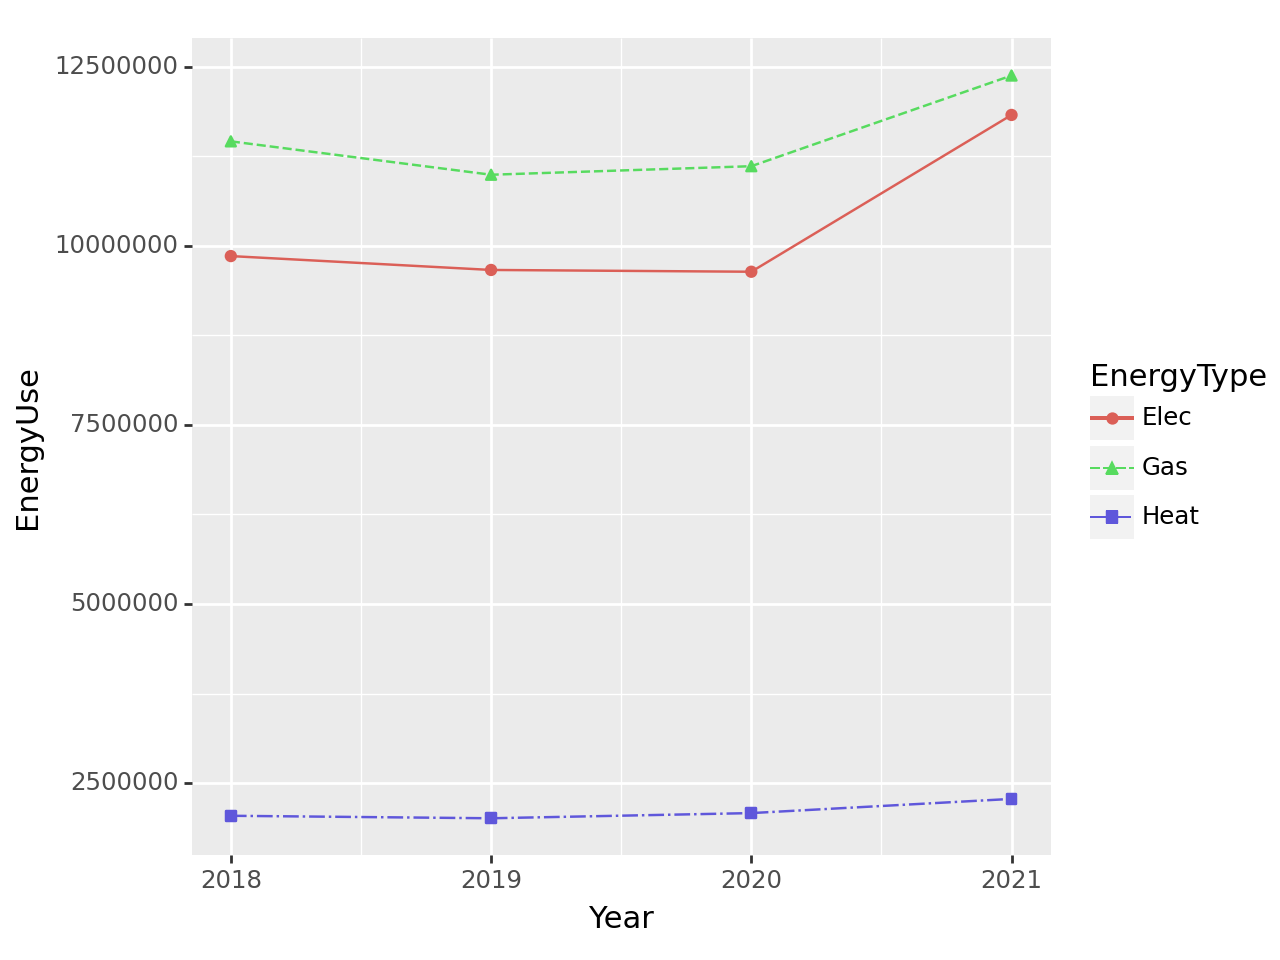

<Figure Size: (640 x 480)>

In [208]:
fig = ggplot(tidydata)
point = geom_point(aes(x = 'Year', y = 'EnergyUse', color = 'EnergyType', shape = 'EnergyType'))
line = geom_line(aes(x = 'Year', y = 'EnergyUse', color = 'EnergyType', linetype = 'EnergyType'))

fig + point + line

(3) 2020년 대비 2021년의 전기에너지 사용량 증가

In [209]:
df.drop(['Reg', 'BldgCount', 'Area'], axis = 1).loc[lambda _df : _df.Year >= 2020]\
.reset_index(drop = True).set_index(['Prov', 'Year']).stack().reset_index()\
.loc[lambda _df : _df.level_2 == 'Elec'].reset_index(drop = True)\
.pivot_table(index = ['Prov', 'Year'], values = 0, aggfunc = 'sum').reset_index()\
.rename({0 : 'ElecUse'}, axis = 1).pivot_table(index = 'Prov', columns = 'Year', values = 'ElecUse')\
.reset_index().rename({2020 : '2020', 2021 : '2021'}, axis = 1).assign(ElecUseInc = lambda _df : (_df['2021']/_df['2020'] - 1))\
.sort_values('ElecUseInc', ascending = False).reset_index(drop = True)\
.drop(['2020', '2021'], axis = 1).reset_index().rename({'index' : 'Rank'}, axis = 1)\
.assign(Top2 = lambda _df : _df.Rank.apply(lambda x : True if x < 2 else False))

Year,Rank,Prov,ElecUseInc,Top2
0,0,Seoul,0.825070,True
1,1,Busan,0.735943,True
2,2,Sejongsi,0.049893,False
3,3,Jeju-do,0.047349,False
4,4,Gyeonggi-do,0.036217,False
5,5,Incheon,0.033449,False
6,6,Chungcheongnam-do,0.032079,False
7,7,Daejeon,0.024726,False
8,8,Gyeongsangbuk-do,0.017430,False
9,9,Gwangju,0.016294,False


In [210]:
tidydata = df.drop(['Reg', 'BldgCount', 'Area'], axis = 1).loc[lambda _df : _df.Year >= 2020]\
.reset_index(drop = True).set_index(['Prov', 'Year']).stack().reset_index()\
.loc[lambda _df : _df.level_2 == 'Elec'].reset_index(drop = True)\
.pivot_table(index = ['Prov', 'Year'], values = 0, aggfunc = 'sum').reset_index()\
.rename({0 : 'ElecUse'}, axis = 1).pivot_table(index = 'Prov', columns = 'Year', values = 'ElecUse')\
.reset_index().rename({2020 : '2020', 2021 : '2021'}, axis = 1).assign(ElecUseInc = lambda _df : (_df['2021']/_df['2020'] - 1))\
.sort_values('ElecUseInc', ascending = False).reset_index(drop = True)\
.drop(['2020', '2021'], axis = 1).reset_index().rename({'index' : 'Rank'}, axis = 1)\
.assign(Top2 = lambda _df : _df.Rank.apply(lambda x : True if x < 2 else False))

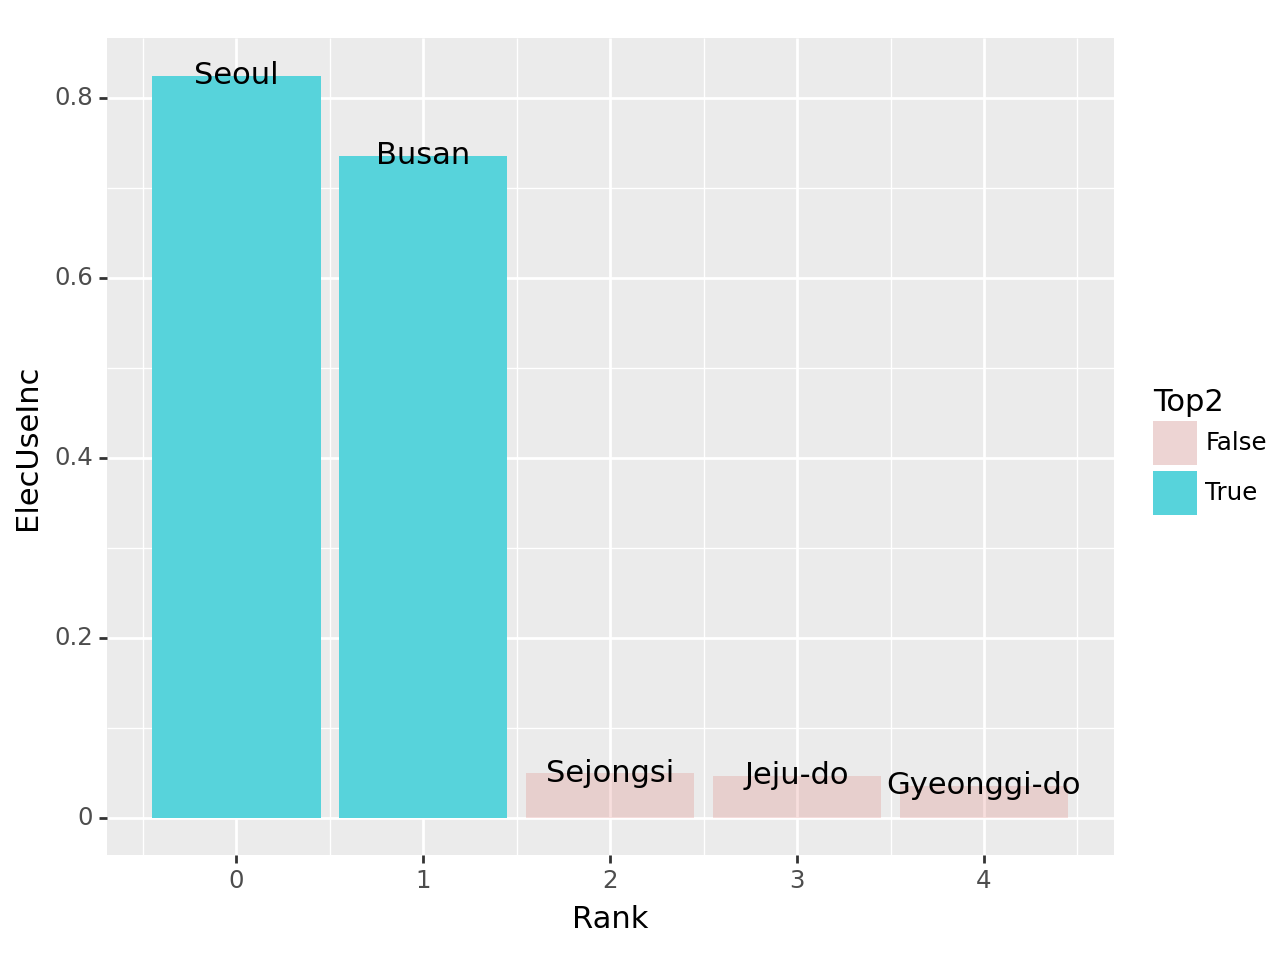

<Figure Size: (640 x 480)>

In [211]:
fig = ggplot(tidydata.query('Rank<5'))
col = geom_col(aes(x='Rank',y='ElecUseInc',fill='Top2',alpha='Top2'))
text = geom_text(aes(x='Rank',y='ElecUseInc',label='Prov'))
fig + col + text + scale_alpha_manual(values={True: 1, False: 0.2})

(4) 건물당 에너지 소비량 : 연도별 상위 15구 비교

In [212]:
df.drop(['Area'], axis = 1).set_index(['Reg', 'BldgCount', 'Year', 'Prov']).assign(Total = lambda _df : _df.Elec + _df.Gas + _df.Heat)\
.drop(['Elec', 'Gas', 'Heat'], axis = 1).reset_index().assign(EUB = lambda _df : _df.Total / _df.BldgCount)\
.drop(['BldgCount', 'Total'], axis = 1)

,Reg,Year,Prov,EUB
0,종로구,2018,Seoul,8.195884
1,중구,2018,Seoul,14.860823
2,용산구,2018,Seoul,8.715889
3,성동구,2018,Seoul,11.845910
4,광진구,2018,Seoul,9.336292
...,...,...,...,...
995,함양군,2021,Gyeongsangnam-do,0.759056
996,거창군,2021,Gyeongsangnam-do,1.318135
997,합천군,2021,Gyeongsangnam-do,0.473034
998,제주시,2021,Jeju-do,1.922449


In [213]:
g = df.drop(['Area'], axis = 1).set_index(['Reg', 'BldgCount', 'Year', 'Prov']).assign(Total = lambda _df : _df.Elec + _df.Gas + _df.Heat)\
.drop(['Elec', 'Gas', 'Heat'], axis = 1).reset_index().assign(EUB = lambda _df : _df.Total / _df.BldgCount)\
.drop(['BldgCount', 'Total'], axis = 1).groupby(by = 'Year')

In [214]:
pd.concat([_df.sort_values('EUB', ascending = False).reset_index(drop = True).reset_index().iloc[:15] for i, _df in g], axis = 0)

,index,Reg,Year,Prov,EUB
0,0,수지구,2018,Gyeonggi-do,31.176952
1,1,연수구,2018,Incheon,28.938482
2,2,영통구,2018,Gyeonggi-do,28.919546
3,3,분당구,2018,Gyeonggi-do,27.907130
4,4,강남구,2018,Seoul,26.924739
5,5,노원구,2018,Seoul,24.404874
6,6,서초구,2018,Seoul,23.540188
7,7,동안구,2018,Gyeonggi-do,21.795256
8,8,일산서구,2018,Gyeonggi-do,20.287615
9,9,송파구,2018,Seoul,19.275914


In [215]:
tidydata = pd.concat([_df.sort_values('EUB', ascending = False).reset_index(drop = True).reset_index().iloc[:15] for i, _df in g], axis = 0).rename({'index' : 'Rank'}, axis = 1)

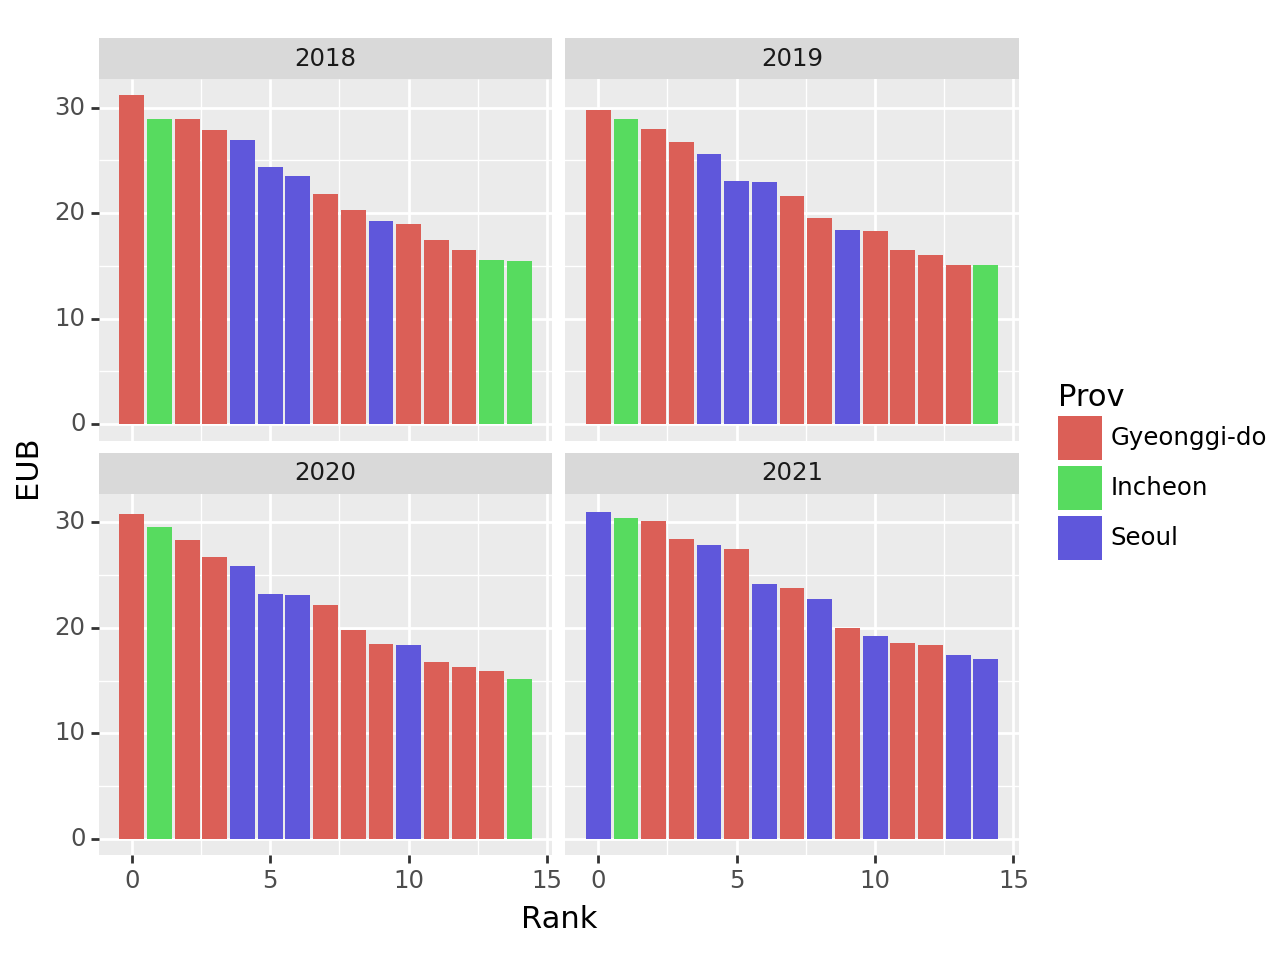

<Figure Size: (640 x 480)>

In [216]:
fig = ggplot(tidydata)
bar = geom_col(aes(x = 'Rank', y = 'EUB', fill = 'Prov'))

fig + bar + facet_wrap('Year')

In [8]:
df = df.rename(name_dict, axis = 1).set_index(['Reg', 'Prov'])\
.applymap(lambda x : str(x).replace(',','')).astype('int').reset_index()

### **(5) 수도권과 비수도권의 전기 에너지 사용량 및 사용 비율**

수도권과 비수도권의 전기에너지 사용량 및 사용 비율을 계산하고 시각화하라.

ⅰ) 불필요한 열 드롭

In [10]:
df.drop(['Reg', 'BldgCount', 'Area'], axis = 1)

,Prov,Elec,Gas,Heat,Year
0,Seoul,64818,82015,111,2018
1,Seoul,81672,75260,563,2018
2,Seoul,52659,85220,12043,2018
3,Seoul,60559,107416,0,2018
4,Seoul,70609,130308,0,2018
...,...,...,...,...,...
995,Gyeongsangnam-do,6328,3164,0,2021
996,Gyeongsangnam-do,10404,8850,0,2021
997,Gyeongsangnam-do,7587,0,0,2021
998,Jeju-do,103217,25689,0,2021


ⅱ) 수도권과 비수도권으로 분류, 에너지 사용량 총합 열 추가

In [20]:
df.drop(['Reg', 'BldgCount', 'Area'], axis = 1)\
.assign(Metro = lambda _df : (_df.Prov == 'Seoul') | (_df.Prov == 'Gyeonggi-do') | (_df.Prov == 'Incheon'))\
.assign(Total = lambda _df : _df.Gas + _df.Heat + _df.Elec)

,Prov,Elec,Gas,Heat,Year,Metro,Total
0,Seoul,64818,82015,111,2018,True,146944
1,Seoul,81672,75260,563,2018,True,157495
2,Seoul,52659,85220,12043,2018,True,149922
3,Seoul,60559,107416,0,2018,True,167975
4,Seoul,70609,130308,0,2018,True,200917
...,...,...,...,...,...,...,...
995,Gyeongsangnam-do,6328,3164,0,2021,False,9492
996,Gyeongsangnam-do,10404,8850,0,2021,False,19254
997,Gyeongsangnam-do,7587,0,0,2021,False,7587
998,Jeju-do,103217,25689,0,2021,False,128906


ⅲ) 전기에너지만 취급하고, 지역 또한 수도권과 비수도권만 취급하도록 피벗 테이블 제작

In [42]:
df.drop(['Reg', 'BldgCount', 'Area'], axis = 1)\
.assign(Metro = lambda _df : (_df.Prov == 'Seoul') | (_df.Prov == 'Gyeonggi-do') | (_df.Prov == 'Incheon'))\
.assign(Total = lambda _df : _df.Gas + _df.Heat + _df.Elec)\
.pivot_table(index = ['Year', 'Metro'], values = ['Elec', 'Total'], aggfunc = 'sum')

Elec     Total
Year Metro                   
2018 False  5099629  10596330
     True   4755552  12759257
2019 False  4986896  10347388
     True   4674628  12313876
2020 False  4986629  10506973
     True   4650021  12320877
2021 False  5500878  11393712
     True   6323846  15085544

ⅳ) 비율 추가하고, 한 열에 몰아서 타이디데이터로 저장

In [43]:
tidydata = df.drop(['Reg', 'BldgCount', 'Area'], axis = 1)\
.assign(Metro = lambda _df : (_df.Prov == 'Seoul') | (_df.Prov == 'Gyeonggi-do') | (_df.Prov == 'Incheon'))\
.assign(Total = lambda _df : _df.Gas + _df.Heat + _df.Elec)\
.pivot_table(index = ['Year', 'Metro'], values = ['Elec', 'Total'], aggfunc = 'sum')\
.reset_index().assign(ElecRate = lambda _df : _df.Elec / _df.Total).drop('Total', axis = 1)\
.assign(a = lambda _df : _df.Elec).drop('Elec', axis = 1).rename({'a' : 'ElecUse'}, axis = 1)\
.set_index(['Year', 'Metro']).stack().reset_index().rename({'level_2' : 'Type', 0 : 'Amount'}, axis = 1)

tidydata

,Year,Metro,Type,Amount
0,2018,False,ElecRate,4.812637e-01
1,2018,False,ElecUse,5.099629e+06
2,2018,True,ElecRate,3.727139e-01
3,2018,True,ElecUse,4.755552e+06
4,2019,False,ElecRate,4.819473e-01
5,2019,False,ElecUse,4.986896e+06
6,2019,True,ElecRate,3.796228e-01
7,2019,True,ElecUse,4.674628e+06
8,2020,False,ElecRate,4.746019e-01
9,2020,False,ElecUse,4.986629e+06


ⅴ) 그래프 산출

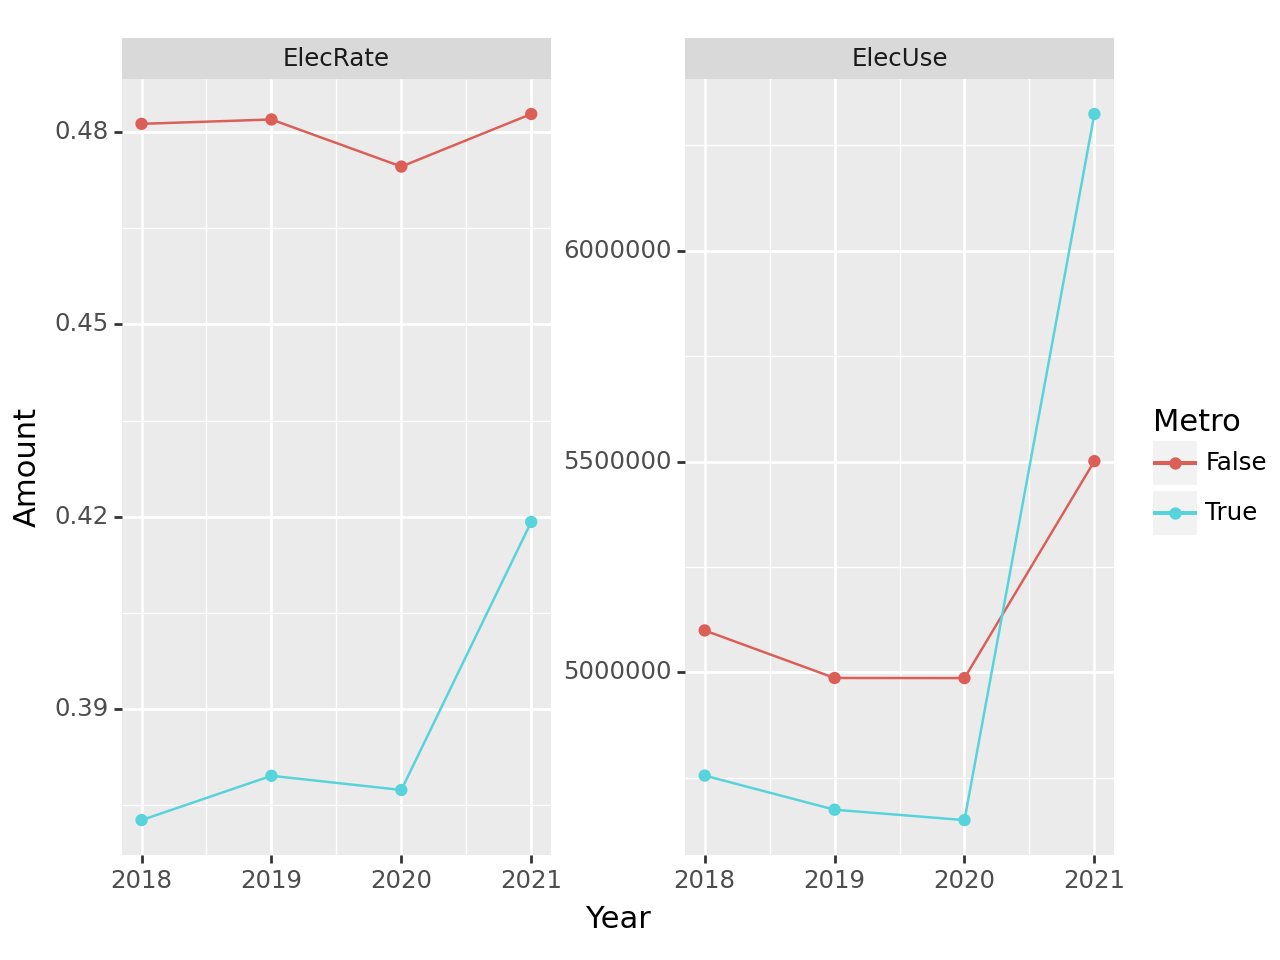

<Figure Size: (640 x 480)>

In [45]:
fig = ggplot(tidydata)
line = geom_line(aes(x = 'Year', y = 'Amount', color = 'Metro'))
point = geom_point(aes(x = 'Year', y = 'Amount', color = 'Metro'))

fig + line + point + facet_wrap('Type', scales = 'free')

# 2. FIFA - 90점

아래는 FIFA22 자료를 불러오는 코드이다.

In [48]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2021/master/_notebooks/2021-10-25-FIFA22_official_data.csv').drop(['Loaned From','Marking'],axis=1).dropna()
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0


아래의 딕셔너리를 이용하여 `Poistion`열을 반환하고, 물음에 답하라.

In [49]:
position_dict = {
    'GOALKEEPER':{'GK'},
    'DEFENDER':{'CB','RCB','LCB','RB','LB','RWB','LWB'},
    'MIDFIELDER':{'CM','RCM','LCM','CDM','RDM','LDM','CAM','RAM','LAM','RM','LM'},
    'FORWARD':{'ST','CF','RF','LF','RW','LW','RS','LS'},
    'SUB':{'SUB'},
    'RES':{'RES'}
}
position_dict

{'GOALKEEPER': {'GK'},
 'DEFENDER': {'CB', 'LB', 'LCB', 'LWB', 'RB', 'RCB', 'RWB'},
 'MIDFIELDER': {'CAM',
  'CDM',
  'CM',
  'LAM',
  'LCM',
  'LDM',
  'LM',
  'RAM',
  'RCM',
  'RDM',
  'RM'},
 'FORWARD': {'CF', 'LF', 'LS', 'LW', 'RF', 'RS', 'RW', 'ST'},
 'SUB': {'SUB'},
 'RES': {'RES'}}

In [50]:
df['Position'] = df.Position.str.split(">").str[-1].apply(lambda x: [k for k,v in position_dict.items() if x in v][0])

In [51]:
df.reset_index(drop = True)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,...,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,...,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,...,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14393,259718,F. Gebhardt,19,https://cdn.sofifa.com/players/259/718/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,52,66,FC Basel 1893,https://cdn.sofifa.com/teams/896/30.png,...,10.0,53.0,45.0,47.0,52.0,57.0,GK,52.0,€361K,6.0
14394,251433,B. Voll,20,https://cdn.sofifa.com/players/251/433/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,58,69,F.C. Hansa Rostock,https://cdn.sofifa.com/teams/27/30.png,...,10.0,59.0,60.0,56.0,55.0,61.0,GK,58.0,€656K,5.0
14395,262846,�. Dobre,20,https://cdn.sofifa.com/players/262/846/22_60.png,Romania,https://cdn.sofifa.com/flags/ro.png,53,63,FC Academica Clinceni,https://cdn.sofifa.com/teams/113391/30.png,...,12.0,57.0,52.0,53.0,48.0,58.0,GK,53.0,€279K,5.0
14396,241317,21 Xue Qinghao,19,https://cdn.sofifa.com/players/241/317/21_60.png,China PR,https://cdn.sofifa.com/flags/cn.png,47,60,Shanghai Shenhua FC,https://cdn.sofifa.com/teams/110955/30.png,...,9.0,49.0,48.0,45.0,38.0,52.0,GK,47.0,€223K,21.0


### **(1) 나이와 포지션에 따른 선수 가치 및 급여 분석**

In [52]:
df.reset_index(drop = True)[['Value', 'Wage', 'Position']]

,Value,Wage,Position
0,€107.5M,€250K,MIDFIELDER
1,€93M,€140K,MIDFIELDER
2,€44.5M,€135K,FORWARD
3,€125.5M,€350K,MIDFIELDER
4,€37M,€45K,DEFENDER
...,...,...,...
14393,€170K,€650,RES
14394,€375K,€950,RES
14395,€180K,€550,RES
14396,€100K,€700,RES


In [78]:
def transss(x) :
    return str(x).replace('€', '').replace('M','*1000000').replace('K', '*1000')

In [54]:
df.reset_index(drop = True)[['Age', 'Value', 'Wage', 'Position']].set_index(['Position', 'Age']).applymap(transss).applymap(eval)\
.astype('float').reset_index()\
.assign(logValue = lambda _df : _df.Value.apply(np.log)).assign(logWage = lambda _df : _df.Wage.apply(np.log))\
.set_index(['Position', 'Age']).stack().reset_index().rename({'level_2' : 'FinancialMetric', 0 : 'LogAmount'}, axis = 1)\
.loc[lambda _df : (_df.FinancialMetric == 'logValue') | (_df.FinancialMetric == 'logWage')].reset_index(drop = True)

,Position,Age,FinancialMetric,LogAmount
0,MIDFIELDER,26,logValue,18.493001
1,MIDFIELDER,26,logWage,12.429216
2,MIDFIELDER,26,logValue,18.348110
3,MIDFIELDER,26,logWage,11.849398
4,FORWARD,34,logValue,17.611000
...,...,...,...,...
28791,RES,20,logWage,6.309918
28792,RES,19,logValue,11.512925
28793,RES,19,logWage,6.551080
28794,SUB,18,logValue,11.608236


In [58]:
tidydata = df.reset_index(drop = True)[['Age', 'Value', 'Wage', 'Position']].set_index(['Position', 'Age']).applymap(transss).applymap(eval)\
.astype('float').reset_index()\
.assign(logValue = lambda _df : _df.Value.apply(np.log)).assign(logWage = lambda _df : _df.Wage.apply(np.log))\
.set_index(['Position', 'Age']).stack().reset_index().rename({'level_2' : 'FinancialMetric', 0 : 'LogAmount'}, axis = 1)\
.loc[lambda _df : (_df.FinancialMetric == 'logValue') | (_df.FinancialMetric == 'logWage')].reset_index(drop = True)\
.loc[lambda _df : (_df.Position != 'RES') & (_df.Position != 'SUB')]

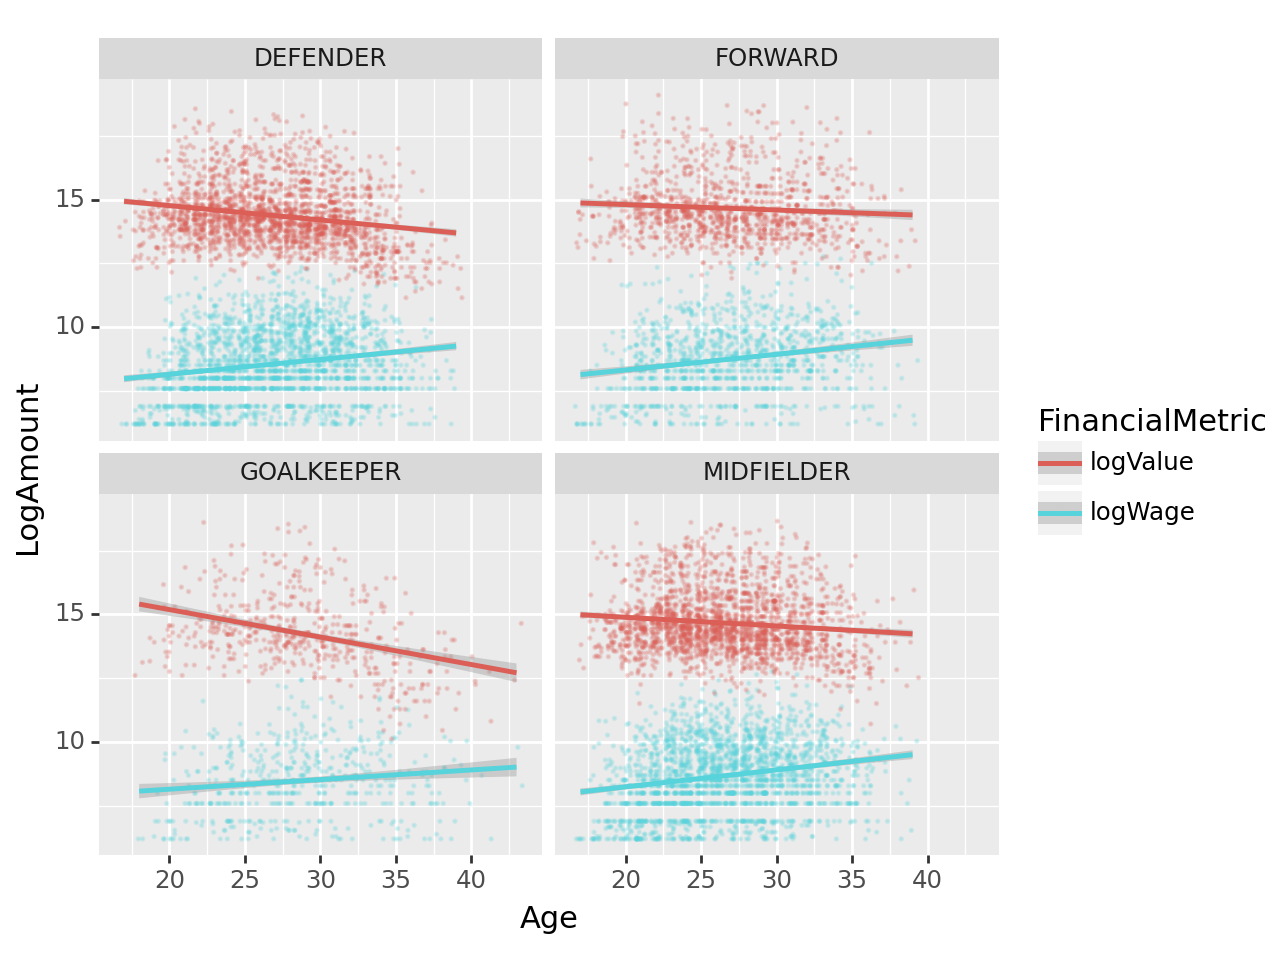

<Figure Size: (640 x 480)>

In [61]:
fig = ggplot(tidydata)
point = geom_point(aes(x = 'Age', y = 'LogAmount', color = 'FinancialMetric'), alpha = 0.2, size = 0.1, position = 'jitter')
smooth = geom_smooth(aes(x = 'Age', y = 'LogAmount', color = 'FinancialMetric'))

fig + point + smooth + facet_wrap('Position')

> 여기서 뭔짓을 해도 그래프가 여섯개가 나와서 뇌정지 왔었는데... 질문 드렸어야 했는데 급급해서 못했네요, 죄송합니다. 아무튼 점수 인정해주셔서 감사합니다.

In [71]:
df = df.reset_index(drop = True)

### **(2) 골키퍼 능력치별 로그급여 추세**

아래의 리스트는 골키퍼와 관련된 능력치이다.

In [62]:
gkstats = ['GKDiving','GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
gkstats

['GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

`gkstats`에 해당하는 능력치와 로그급여(`logWage`)를 산점도로 시각화하고 추세선을 추가하라.

ⅰ) 필요한 열과 행만 선택 후, Wage열을 숫자로 변환

In [88]:
df.loc[df.Position == 'GOALKEEPER', ['Wage', 'GKDiving','GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']].applymap(transss).applymap(eval).reset_index(drop = True)

,Wage,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,200000,87.0,82.0,93.0,88.0,88.0
1,86000,88.0,88.0,91.0,89.0,88.0
2,83000,83.0,78.0,87.0,80.0,86.0
3,18000,84.0,80.0,87.0,83.0,86.0
4,45000,83.0,81.0,85.0,84.0,86.0
...,...,...,...,...,...,...
502,500,57.0,58.0,57.0,60.0,59.0
503,500,60.0,57.0,59.0,57.0,59.0
504,500,59.0,54.0,52.0,49.0,61.0
505,850,61.0,59.0,57.0,58.0,59.0


ⅱ) wide data를 long data로 변환, 이후 급여 수준에 로그를 취함. 타이디데이터로 저장

In [93]:
tidydata = df.loc[df.Position == 'GOALKEEPER', ['Wage', 'GKDiving','GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']].applymap(transss).applymap(eval).reset_index(drop = True)\
.set_index('Wage').stack().reset_index().rename({'level_1' : 'AbilType', 0 : 'Abil'}, axis = 1)\
.assign(logWage = lambda _df : _df.Wage.apply(np.log)).drop('Wage', axis = 1)

tidydata

,AbilType,Abil,logWage
0,GKDiving,87.0,12.206073
1,GKHandling,82.0,12.206073
2,GKKicking,93.0,12.206073
3,GKPositioning,88.0,12.206073
4,GKReflexes,88.0,12.206073
...,...,...,...
2530,GKDiving,58.0,6.907755
2531,GKHandling,58.0,6.907755
2532,GKKicking,47.0,6.907755
2533,GKPositioning,54.0,6.907755


ⅲ) 시각화

C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


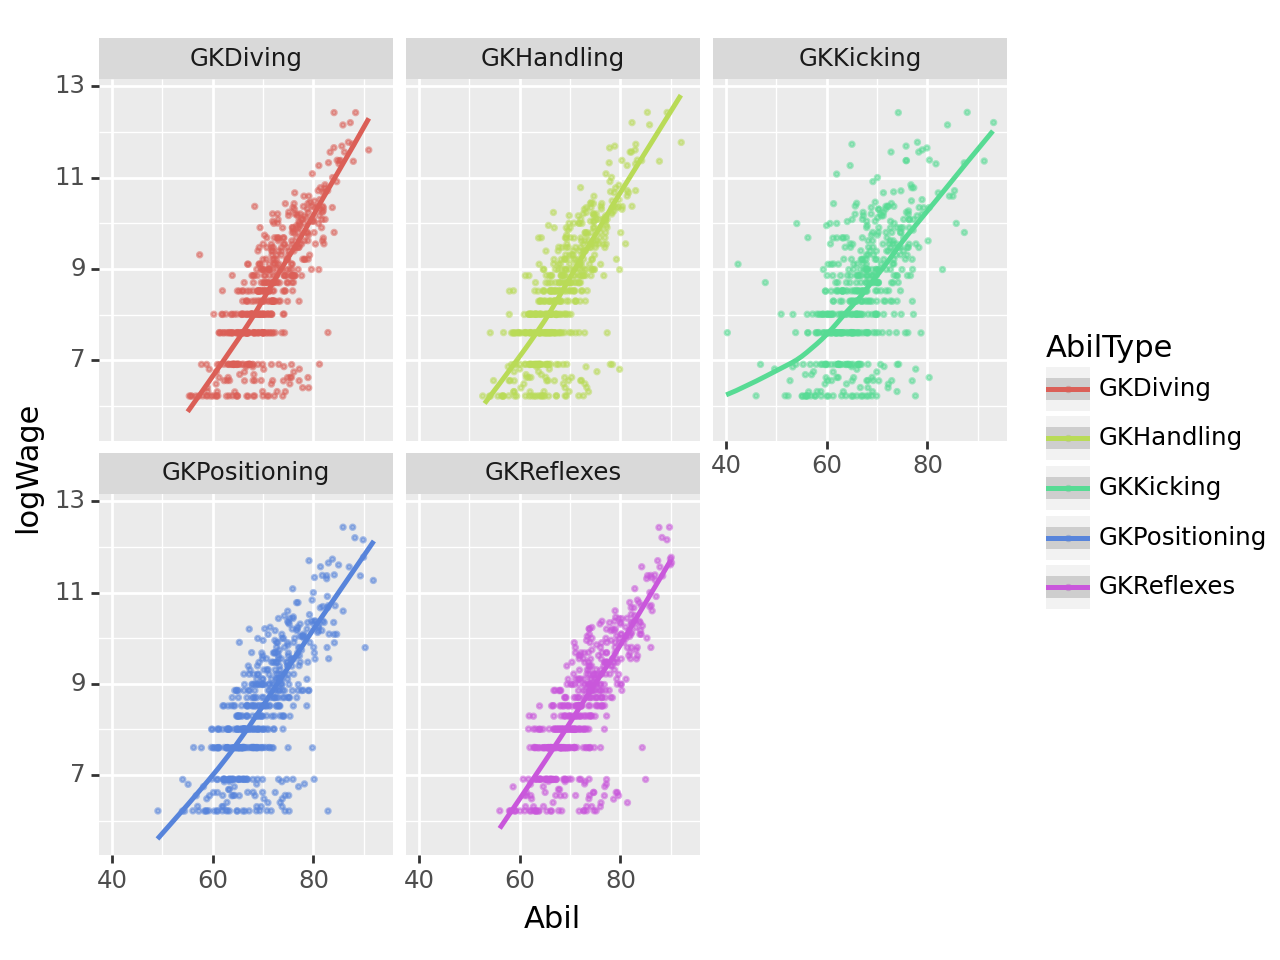

<Figure Size: (640 x 480)>

In [94]:
fig = ggplot(tidydata)
point = geom_point(aes(x = 'Abil', y = 'logWage', color = 'AbilType'), alpha = 0.5, size = 0.5, position = 'jitter')
smooth = geom_smooth(aes(x = 'Abil', y = 'logWage', color = 'AbilType'))

fig + point + smooth + facet_wrap('AbilType')

### **(3) "GKAbillity"에 따른 골키퍼의 Overall 예측 - 20점**

아래의 리스트는 골키퍼와 관련된 능력치이다.

In [ ]:
gkstats = ['GKDiving','GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
gkstats

`gkstats`에 해당하는 능력치의 평균을 계산하고, `GKAbillity`라는 변수에 저장하라. 골키퍼 포지션과 공격수 포지션을 가지는 선수들에 한정하여 `GKAbillity`와 `OverAll`(= 선수의 전반적 능력치)의 관계를 산점도로 시각화하라.

ⅰ) 전처리(슬라이싱, 변환)

In [124]:
df.loc[(df.Position == 'FORWARD') | (df.Position == 'GOALKEEPER'), ['Wage', 'Position', 'GKDiving','GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Overall']].reset_index(drop = True)\
.set_index('Position').applymap(transss).applymap(eval).assign(Wage = lambda _df : _df.Wage.apply(np.log)).rename({'Wage' : 'logWage'}, axis = 1).reset_index()

,Position,logWage,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Overall
0,FORWARD,11.813030,27.0,25.0,31.0,33.0,37.0,88
1,FORWARD,12.676076,6.0,11.0,15.0,14.0,8.0,93
2,FORWARD,10.736397,11.0,8.0,15.0,12.0,7.0,83
3,FORWARD,12.506177,15.0,6.0,12.0,8.0,10.0,92
4,FORWARD,12.506177,14.0,14.0,9.0,11.0,14.0,89
...,...,...,...,...,...,...,...,...
1650,GOALKEEPER,6.214608,57.0,58.0,57.0,60.0,59.0,59
1651,GOALKEEPER,6.214608,60.0,57.0,59.0,57.0,59.0,59
1652,GOALKEEPER,6.214608,59.0,54.0,52.0,49.0,61.0,56
1653,GOALKEEPER,6.745236,61.0,59.0,57.0,58.0,59.0,59


ⅱ) `GKAbility`를 산출하기 위해 다섯개의 열의 평균을 내어 새로운 열로 할당, 필요 없어진 열들을 제거

In [143]:
df.loc[(df.Position == 'FORWARD') | (df.Position == 'GOALKEEPER'), ['Wage', 'Position', 'GKDiving','GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Overall']].reset_index(drop = True)\
.set_index('Position').applymap(transss).applymap(eval).assign(Wage = lambda _df : _df.Wage.apply(np.log)).rename({'Wage' : 'logWage'}, axis = 1).reset_index()\
.assign(GKAbility = lambda _df : _df.iloc[:, 2:7].mean(axis = 1))\
.drop(gkstats, axis = 1)

,Position,logWage,Overall,GKAbility
0,FORWARD,11.813030,88,30.6
1,FORWARD,12.676076,93,10.8
2,FORWARD,10.736397,83,10.6
3,FORWARD,12.506177,92,10.2
4,FORWARD,12.506177,89,12.4
...,...,...,...,...
1650,GOALKEEPER,6.214608,59,58.2
1651,GOALKEEPER,6.214608,59,58.4
1652,GOALKEEPER,6.214608,56,55.0
1653,GOALKEEPER,6.745236,59,58.8


ⅲ) 시각화

In [144]:
tidydata = df.loc[(df.Position == 'FORWARD') | (df.Position == 'GOALKEEPER'), ['Wage', 'Position', 'GKDiving','GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Overall']].reset_index(drop = True)\
.set_index('Position').applymap(transss).applymap(eval).assign(Wage = lambda _df : _df.Wage.apply(np.log)).rename({'Wage' : 'logWage'}, axis = 1).reset_index()\
.assign(GKAbility = lambda _df : _df.iloc[:, 2:7].mean(axis = 1))\
.drop(gkstats, axis = 1)

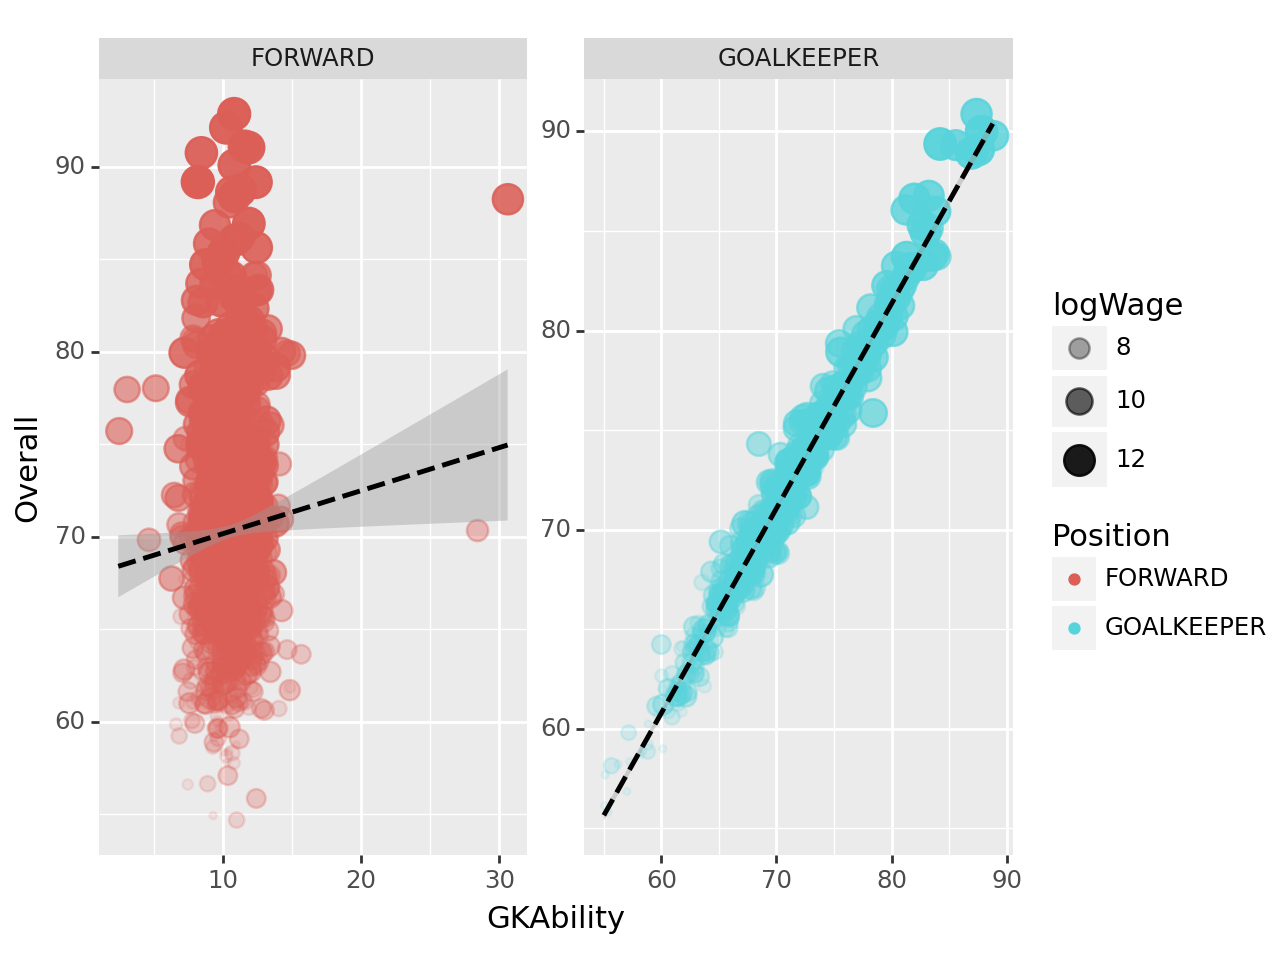

<Figure Size: (640 x 480)>

In [145]:
fig = ggplot(tidydata)
point = geom_point(aes(x = 'GKAbility', y = 'Overall', size = 'logWage', alpha = 'logWage', color = 'Position'), position = 'jitter')
smooth = geom_smooth(aes(x = 'GKAbility', y = 'Overall'), linetype = 'dashed')

fig + point + smooth + facet_wrap('Position', scales = 'free')

### **(4) 포워드와 수비수의 기술별 가치 평가 - 25점**

아래는 축구선수의 능력치와 관련이 있는 column들의 리스트이다. (골키퍼 관련 능력치는 제외하였음)

In [146]:
abilities_list = ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'StandingTackle', 'SlidingTackle']

아래는 위의 `abilities_list`를 적당한 카테고리로 묶은 것이다.

In [147]:
abilities_categories = {
    "FinishingSkills": ['Finishing', 'HeadingAccuracy', 'Volleys', 'LongShots', 'Positioning', 'Vision', 'Penalties', 'ShotPower', 'Jumping'],
    "BallControl_Passing": ['Dribbling', 'Curve', 'Crossing','ShortPassing', 'LongPassing', 'BallControl','FKAccuracy'],
    "Speed_Stamina": ['Acceleration', 'SprintSpeed', 'Agility', 'Stamina'],
    "Reactions_PhysicalAttributes": ['Reactions', 'Balance', 'Strength', 'Composure'],
    "DefensiveSkills": ['Aggression', 'Interceptions', 'StandingTackle', 'SlidingTackle']
}

\- 선수들의 여러 능력치를 `abilities_categories`에 따라 통합하고 각 스킬
카테고리별로 선수의 능력치의 평균을 구하여 `SkillValueCategories`값에
저장하라. 해당 자료를 바탕으로 `SkillValueCategories`와 `logValue`의 산점도를
포지션별로 시각화 하라.

3. 시각화의 해석

(2) 히스토그램 이퀼라이징

> 답 : 유진, 원영, 리즈

(3) 엔스콤의 플랏

> 답 : 유진, 레이, 원영

(4) 아이스크림
> 답 : 원영, 가을, 이서, 레이

(5) 산점도의 해석

> 1, 2, 3, 4